In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["fLength" ,
"fWidth",
"fSize",
"fConc",
"fConc1",
"fAsym",
"fM3Long",
"fM3Trans",
"fAlpha",
"fDist",
"class" ,]

In [ ]:
df=pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"]=='g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


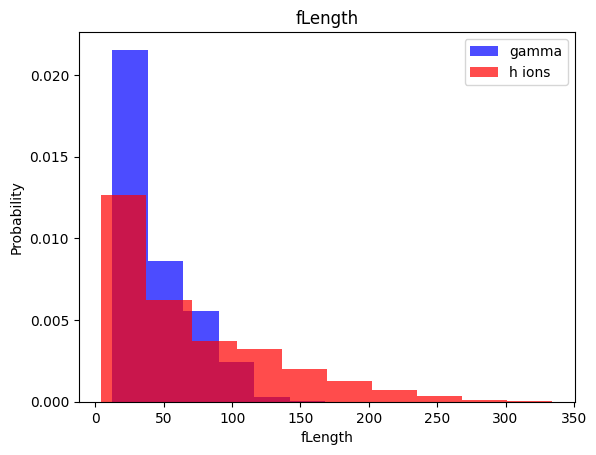

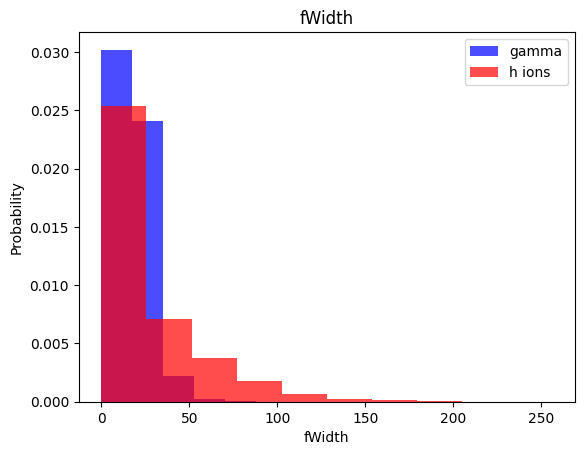

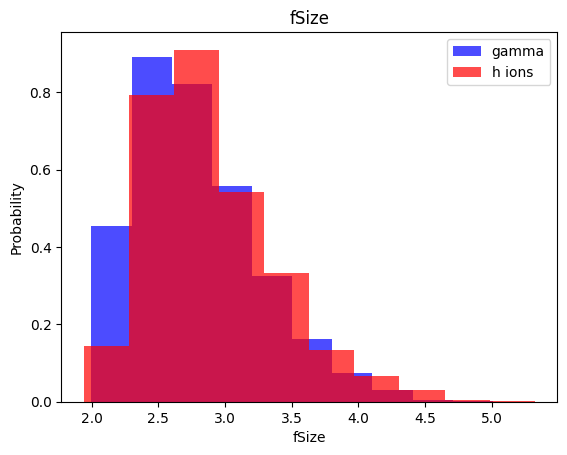

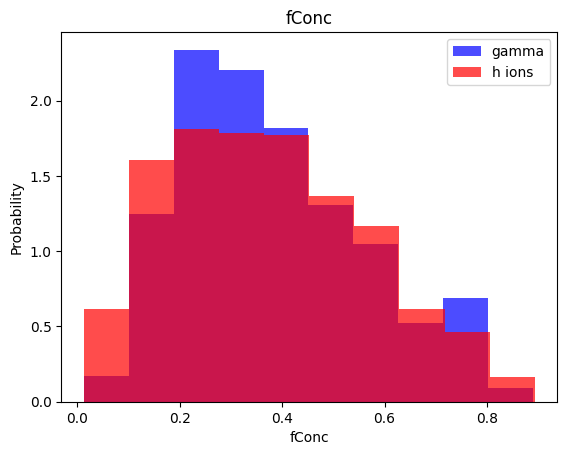

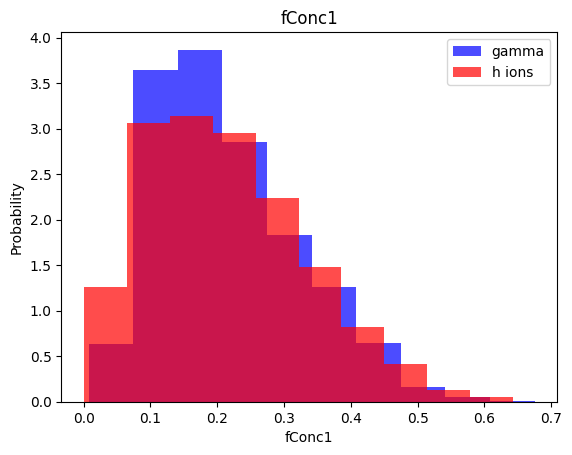

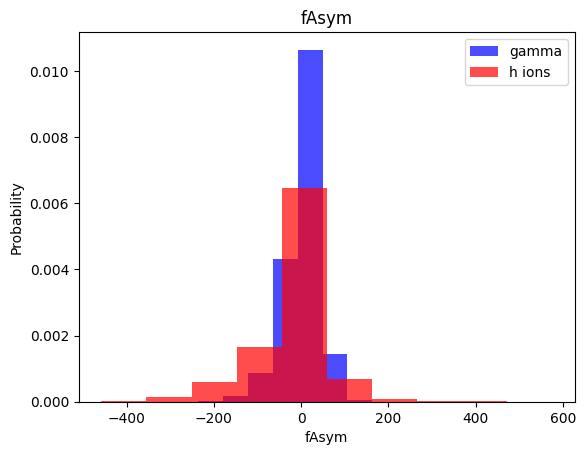

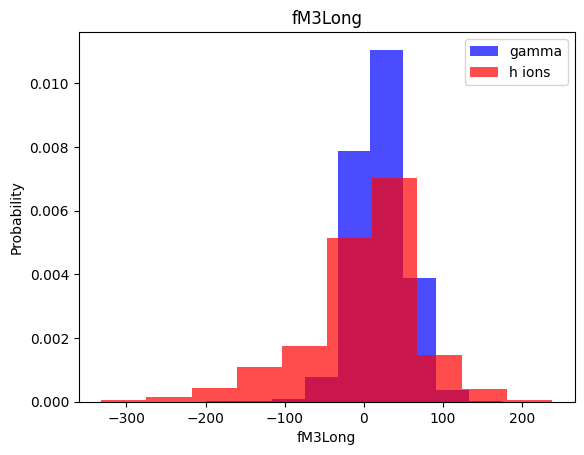

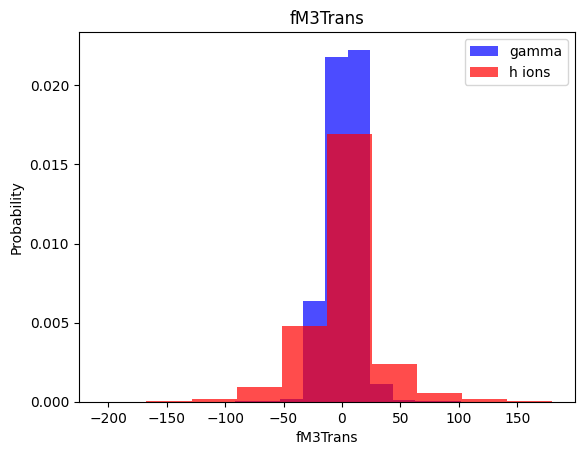

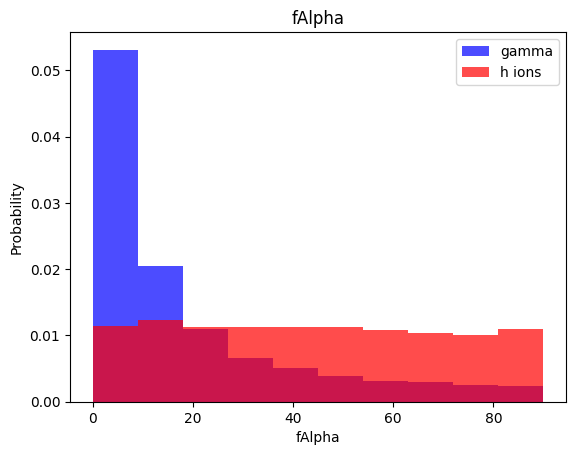

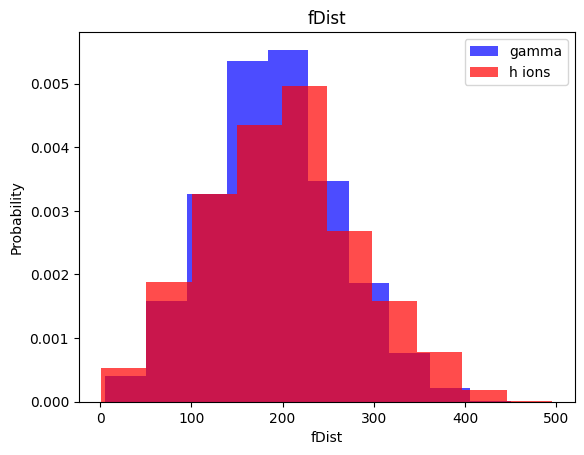

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label], color='red',label='h ions',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, validations and test datasets

In [ ]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(df, oversample=False):
  x=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1, 1))))
  return data,x,y



In [ ]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10739,78.6046,16.5706,3.0048,0.2156,0.1182,70.1416,68.3870,9.9812,1.5600,237.257,1
7534,68.7734,19.1491,2.9245,0.2986,0.1648,-87.3385,23.0281,-17.3409,2.2482,243.143,1
2381,29.3867,18.6769,2.6345,0.3875,0.2100,19.1175,22.4800,-7.8413,16.8740,205.283,1
11228,48.0913,21.0416,2.8231,0.2630,0.1480,56.5799,39.4770,-16.5649,3.2173,243.946,1
10311,83.5340,39.6402,3.2430,0.1760,0.1043,71.0278,95.8359,34.8795,22.5710,160.652,1
...,...,...,...,...,...,...,...,...,...,...,...
6955,24.8839,8.9001,2.5982,0.6683,0.3997,24.1194,23.4441,-7.8026,1.8198,182.854,1
4492,32.9368,18.0335,2.6269,0.3424,0.1854,37.2240,25.0526,14.4716,23.5489,149.560,1
2864,50.0755,23.0582,3.0772,0.2285,0.1201,22.2418,55.4458,15.7230,5.6470,237.610,1
6056,19.3383,12.7040,2.3847,0.5485,0.2907,-14.4994,-13.9911,-7.4292,57.9460,189.524,1


In [ ]:
from matplotlib import scale
train, xtrain, ytrain=scale_dataset(train, oversample=True)
valid, xvalid, yvalid=scale_dataset(valid, oversample=False)
test, xtest, ytest=scale_dataset(test, oversample=False)

# **Loss Function**
## L1 Loss
loss=sum(|Yreal-Ypredicted|)

## L2 Loss
loss=sum((Yreal-Ypredicted)^2)


# Binary Entropy Loss
loss decreases as performance betters

# **Machine Learning**

1. K Nearest Neighbours(Classification Algorithm):
basically what it does is it takes the neighborhood values and data points, find what output is in the maximum for the area where the target point is kept and assumes that is the target output value for the same.

it first finds the distance between all the points and then decides the majority vote column.

the distance is computed by Euclidean distance formula
d=root((x1-x2)^2+(y1-y2)^2)

Implementation of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain, ytrain)
ypred=knn_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1348
           1       0.85      0.87      0.86      2456

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.82      0.81      3804



# Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_model=nb_model.fit(xtrain,ytrain)
ypred=nb_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51      1348
           1       0.73      0.91      0.81      2456

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model=LogisticRegression()
lr_model=lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1348
           1       0.84      0.82      0.83      2456

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model=svm_model.fit(xtrain,ytrain)
ypred=svm_model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1348
           1       0.89      0.90      0.89      2456

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
nnmodel=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nnmodel.compile(optimizer=tf.keras.optimizers.Adam(0.005),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nnmodel.fit(xtrain,ytrain,epochs=100,batch_size=32,validation_split=0.2,verbose=0)

Epoch 1/100
369/369 [==============================] - 2s 3ms/step - loss: 0.4587 - accuracy: 0.7799 - val_loss: 0.6227 - val_accuracy: 0.6444
Epoch 2/100
369/369 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8396 - val_loss: 0.5914 - val_accuracy: 0.7129
Epoch 3/100
369/369 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.8508 - val_loss: 0.6284 - val_accuracy: 0.6817
Epoch 4/100
369/369 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8543 - val_loss: 0.4898 - val_accuracy: 0.7654
Epoch 5/100
369/369 [==============================] - 2s 7ms/step - loss: 0.3453 - accuracy: 0.8548 - val_loss: 0.5224 - val_accuracy: 0.7444
Epoch 6/100
369/369 [==============================] - 1s 4ms/step - loss: 0.3394 - accuracy: 0.8610 - val_loss: 0.4445 - val_accuracy: 0.7725
Epoch 7/100
369/369 [==============================] - 2s 4ms/step - loss: 0.3355 - accuracy: 0.8592 - val_loss: 0.4988 - val_accuracy: 0.7471

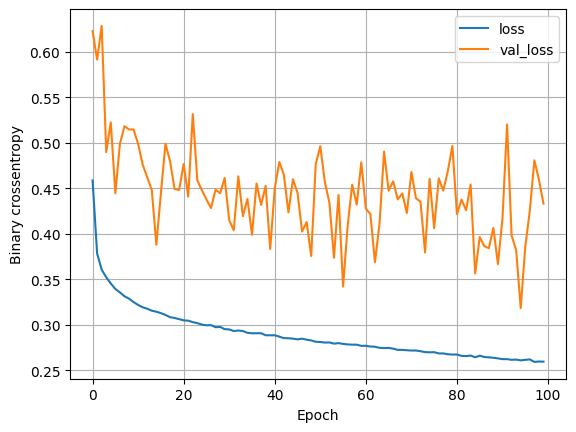

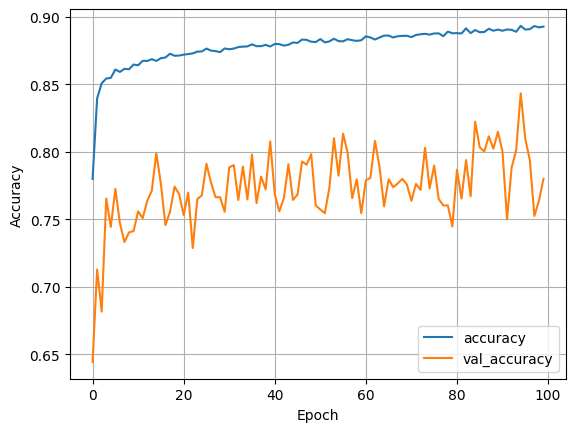

In [ ]:
plot_loss(history)
plot_accuracy(history)